In [1]:
# Final Version
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ppscore as pps
%matplotlib inline

os.chdir('/Users/bmr225/Documents/PythonCodes/TDS_tutorials')

In [2]:
# To hide all the warnings in Python
import warnings
warnings.filterwarnings('ignore')

## INTRODUCTION
Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in German. The autos dataset download from Kaggle. Link: https://www.kaggle.com/orgesleka/used-cars-database/kernels

Several questions can be asked while exploring the dataset such as:

### Q1 what is the most popular car brands in the market (Germany) ? 
By computing the frequency of the ads of different car brands, we can get an idea of the popular cars in the German market.

### Q2 Can we predict the prices of the cars based on its criteria?
We are going to build a predictive model of the car prices based on the descriptions provided in the ads.

### Q3 How do the used cars ads cluster together? 
Do the cars cluster based on their prices, brands, mileage?



## Part I: Exploratory Data Analysis and Data Cleaning

In [3]:
# Load the data
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [4]:
# Check the first 5 observations from the data
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset contains NaN or Null values in the vehicleType,yearOfRegistration,gearbox, model, fuelType, notRepairedDamage

## A. Data Cleaning

## I. Changing the names of columns

Since the dataset is scraped of the craiglist website, it requires data cleaning.

In [6]:
# Replaces all spaces with underscores
autos.rename(columns={'yearOfRegistration': 'registration_year',
                      'monthOfRegistration': 'registration_month', 
                      'notRepairedDamage':'unrepaired_damage',
                      'dateCreated':'ad_created',
                      'vehicleType':'vehicle_type',
                      'lastSeen':'last_seen',
                      'dateCrawled':'date_crawled',
                      'offeType': 'offer_type',
                      'fuelType': 'fuel_type',
                      'postalCode': 'postal_code'}, inplace=True)

In [7]:
autos.describe(include ='all') # to include both categorical and numerical values
# For Categorial data, describe gives the information of the most frequent item in the list.. For Numerical data, we get descriptive statistics.

,date_crawled,name,seller,offerType,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nrOfPictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-11 22:38:16,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## II. Cleaning numerical columns and converting them to either float or int

In [8]:
# Removing the $ from the price string and converting it to float
autos["price"] = autos["price"].str.replace('$','').str.replace(',','').astype(float)
autos.rename({'price':'price_dollars'}, axis =1, inplace = True)

In [9]:
# Removing the km from the odometer string and converting it to float
autos["odometer"] = autos["odometer"].str.replace('km','').str.replace(',','').astype(float)
autos.rename({'odometer':'odometer_km'}, axis =1, inplace = True)

## III. Cleaning date columns

In [10]:
import time
cols = ['date_crawled', 'ad_created','last_seen']
for col in cols:
    autos[col]= autos[col].apply(lambda x: x[:10])# removing the time.. 
    autos[col]= pd.to_datetime(autos[col])

## B. Outliers Detection

In [11]:
# Another option is a column transfer..
import numpy as np
def find_IQR(col):
    
    lower_bound = np.percentile(col,25,axis = 0)
    upper_bound = np.percentile(col,75, axis = 0)
      
    return lower_bound, upper_bound, (upper_bound - lower_bound)

In [12]:
def outliers_clean(df,col):
    
    Q1, Q3, iqr = find_IQR(df[col])
    
    if sum(list(df[col]< Q1 - 1.5*Q1)): # not empty list
       df.loc[(df[col] < Q1 - 1.5*Q1), col]= Q1 - 1.5*Q1
    
    if sum(list(df[col] > Q3 + 1.5*Q3)): 
         df.loc[(df[col] > Q3 + 1.5*Q3), col]= Q3 +  1.5*Q3 
            
    return df

In [13]:
autos = outliers_clean(autos,'odometer_km')
autos = outliers_clean(autos,'price_dollars')

In [14]:
##Checking the output
Q1, Q3, iqr = find_IQR(autos['odometer_km'])
l_lower_ = autos[(autos['odometer_km'] < Q1 - 1.5*Q1)].index.tolist()
l_upper_ = autos[(autos['odometer_km'] > Q3 +1.5*Q3)].index.tolist()
#These lists should be empty
print(len(l_lower_))
print(len(l_upper_))

0
0


We need to change the lower bound of outlier removal for 'price_dollars' and 'odometer_km' since the minimum is 0

In [15]:
autos['price_dollars'].describe() 

count    50000.000000
mean      5013.149580
std       5210.112437
min          0.000000
25%       1100.000000
50%       2950.000000
75%       7200.000000
max      18000.000000
Name: price_dollars, dtype: float64

In [16]:
sum(autos['price_dollars'] ==0)

1421

In [17]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Sometimes, the lower bound of outlier detection can fail to eliminate the 0 dollars price values( There are 1421 zero price values).... We are setting the low bound for price_dollars to Q1 instead of (Q1-1.5*IQR) 

In [18]:
Q1, Q3, iqr = find_IQR(autos['price_dollars'])
autos.loc[(autos['price_dollars'] < Q1),'price_dollars'] = Q1

In [19]:
autos['price_dollars'].describe()

count    50000.000000
mean      5149.457100
std       5094.796429
min       1100.000000
25%       1100.000000
50%       2950.000000
75%       7200.000000
max      18000.000000
Name: price_dollars, dtype: float64

## C. Dealing with Null values

### Imputation of categorical columns

In [20]:
autos2 = autos.copy()

In [21]:
autos2.dropna(inplace = True)
autos2.shape
### There are lot of NaNs.. it's not practical of dropping them off.. 
# numerical columns such as price_dollars, odometer_km have no null values.. but categorical data have many null values..
# let's try imputation

(35047, 20)

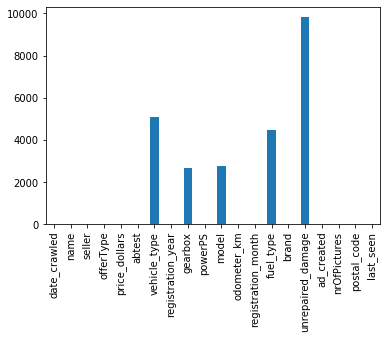

In [22]:
autos.isnull().sum().plot(kind = 'bar')

In [23]:
# Imputation: another option later is column transformer.. 
#Here let's write a function:
from sklearn.impute import SimpleImputer

cols = list(autos.columns)
nan_cols_ind = [cols.index(col) for col in cols if autos[col].isnull().any()]


def impute_cols(df,inds,cols):
    
    df_array = df.iloc[:,:].values
    
    for ind in inds:
        if df.iloc[:,ind].dtype =='O': # categorical column
           imputer = SimpleImputer(missing_values = np.nan ,strategy='most_frequent')
        elif df.iloc[:,ind].dtype =='float64'| df.iloc[:,ind].dtype =='int64':
            imputer = SimpleImputer(missing_values = np.nan ,strategy='mean')
           
        df_array[:,ind] = imputer.fit_transform(df_array[:,ind].reshape(-1,1)).flatten()
               
    return df_array # numpy array

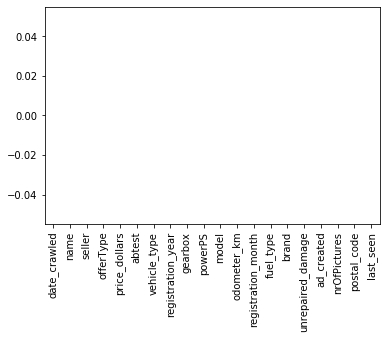

In [24]:
# The function now works.. 
autos_imp_array = impute_cols(autos,nan_cols_ind,cols)
# output of the function is an array.. converting to dataframe again.. 
autos_imp = pd.DataFrame(autos_imp_array)
autos_imp.columns = cols
# plotting to check if any null values left.. 
autos_imp.isnull().sum().plot(kind = 'bar')  # No null values.. 

In [25]:
autos_imp.info() # after converstion from an array to dataframe.. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        50000 non-null  datetime64[ns]
 1   name                50000 non-null  object        
 2   seller              50000 non-null  object        
 3   offerType           50000 non-null  object        
 4   price_dollars       50000 non-null  object        
 5   abtest              50000 non-null  object        
 6   vehicle_type        50000 non-null  object        
 7   registration_year   50000 non-null  object        
 8   gearbox             50000 non-null  object        
 9   powerPS             50000 non-null  object        
 10  model               50000 non-null  object        
 11  odometer_km         50000 non-null  object        
 12  registration_month  50000 non-null  object        
 13  fuel_type           50000 non-null  object    

In [26]:
autos_imp[['registration_year','registration_month','nrOfPictures','postal_code']]= autos_imp[['registration_year','registration_month','nrOfPictures','postal_code']].astype(int)

In [27]:
autos_imp[['price_dollars','odometer_km']] = autos_imp[['price_dollars','odometer_km']].astype(float)

## D. Removing duplicates data

In [28]:
if autos_imp.duplicated().any():
   autos_imp.drop_duplicates(inplace = True)

autos_imp.shape

(49979, 20)

In [29]:
autos_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49979 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        49979 non-null  datetime64[ns]
 1   name                49979 non-null  object        
 2   seller              49979 non-null  object        
 3   offerType           49979 non-null  object        
 4   price_dollars       49979 non-null  float64       
 5   abtest              49979 non-null  object        
 6   vehicle_type        49979 non-null  object        
 7   registration_year   49979 non-null  int64         
 8   gearbox             49979 non-null  object        
 9   powerPS             49979 non-null  object        
 10  model               49979 non-null  object        
 11  odometer_km         49979 non-null  float64       
 12  registration_month  49979 non-null  int64         
 13  fuel_type           49979 non-null  object    

### Dropping irrelevant columns

In [30]:
# Drop the nrOfPictures column from the features as it is only 0
autos_imp.drop('nrOfPictures', axis = 1, inplace = True)

## Checking the dates columns

In [31]:
# Normalized value_counts() with index sorting
autos['ad_created'].value_counts(normalize=True, dropna = False).sort_index()

2015-06-11    0.00002
2015-08-10    0.00002
2015-09-09    0.00002
2015-11-10    0.00002
2015-12-05    0.00002
               ...   
2016-04-03    0.03892
2016-04-04    0.03688
2016-04-05    0.01184
2016-04-06    0.00326
2016-04-07    0.00128
Name: ad_created, Length: 76, dtype: float64

(array([735750., 735780., 735811., 735842., 735872., 735903., 735933.,
        735964., 735995., 736024., 736055.]),
 <a list of 11 Text xticklabel objects>)

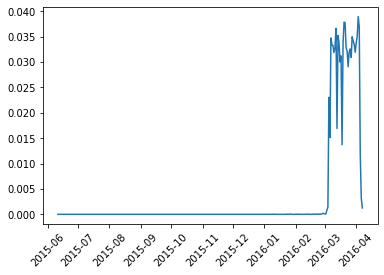

In [32]:
date_s = autos['ad_created'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

In [33]:
autos['date_crawled'].value_counts(normalize=True, dropna = False).sort_index()

2016-03-05    0.02538
2016-03-06    0.01394
2016-03-07    0.03596
2016-03-08    0.03330
2016-03-09    0.03322
2016-03-10    0.03212
2016-03-11    0.03248
2016-03-12    0.03678
2016-03-13    0.01556
2016-03-14    0.03662
2016-03-15    0.03398
2016-03-16    0.02950
2016-03-17    0.03152
2016-03-18    0.01306
2016-03-19    0.03490
2016-03-20    0.03782
2016-03-21    0.03752
2016-03-22    0.03294
2016-03-23    0.03238
2016-03-24    0.02910
2016-03-25    0.03174
2016-03-26    0.03248
2016-03-27    0.03104
2016-03-28    0.03484
2016-03-29    0.03418
2016-03-30    0.03362
2016-03-31    0.03192
2016-04-01    0.03380
2016-04-02    0.03540
2016-04-03    0.03868
2016-04-04    0.03652
2016-04-05    0.01310
2016-04-06    0.00318
2016-04-07    0.00142
Name: date_crawled, dtype: float64

(array([736028., 736032., 736036., 736040., 736044., 736048., 736052.,
        736055., 736059.]),
 <a list of 9 Text xticklabel objects>)

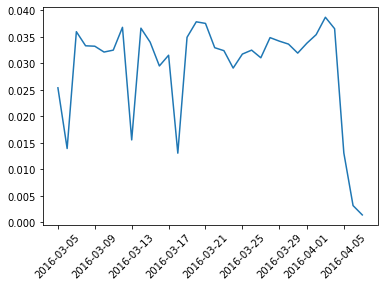

In [34]:
date_s = autos['date_crawled'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

In [35]:
autos['last_seen'].value_counts(normalize=True, dropna = False).sort_index()

2016-03-05    0.00108
2016-03-06    0.00442
2016-03-07    0.00536
2016-03-08    0.00760
2016-03-09    0.00986
2016-03-10    0.01076
2016-03-11    0.01252
2016-03-12    0.02382
2016-03-13    0.00898
2016-03-14    0.01280
2016-03-15    0.01588
2016-03-16    0.01644
2016-03-17    0.02792
2016-03-18    0.00742
2016-03-19    0.01574
2016-03-20    0.02070
2016-03-21    0.02074
2016-03-22    0.02158
2016-03-23    0.01858
2016-03-24    0.01956
2016-03-25    0.01920
2016-03-26    0.01696
2016-03-27    0.01602
2016-03-28    0.02086
2016-03-29    0.02234
2016-03-30    0.02484
2016-03-31    0.02384
2016-04-01    0.02310
2016-04-02    0.02490
2016-04-03    0.02536
2016-04-04    0.02462
2016-04-05    0.12428
2016-04-06    0.22100
2016-04-07    0.13092
Name: last_seen, dtype: float64

(array([736028., 736032., 736036., 736040., 736044., 736048., 736052.,
        736055., 736059.]),
 <a list of 9 Text xticklabel objects>)

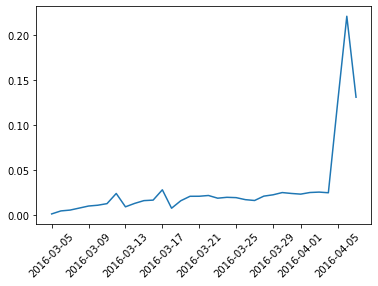

In [36]:
date_s = autos['last_seen'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

In [37]:
autos['registration_year'].value_counts(normalize=True, dropna = False).sort_index()

1000    0.00002
1001    0.00002
1111    0.00002
1500    0.00002
1800    0.00004
         ...   
6200    0.00002
8888    0.00002
9000    0.00004
9996    0.00002
9999    0.00008
Name: registration_year, Length: 97, dtype: float64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text xticklabel objects>)

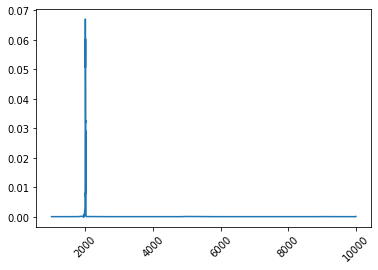

In [38]:
date_s = autos['registration_year'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

In [39]:
# Getting old of erroneous entries > 2016 and too old registration
autos_imp = autos_imp[autos_imp['registration_year'].between(1980,2016)]
display(autos_imp.shape)

(47474, 19)

## E. Correlation Matrix to check for multicolinearity

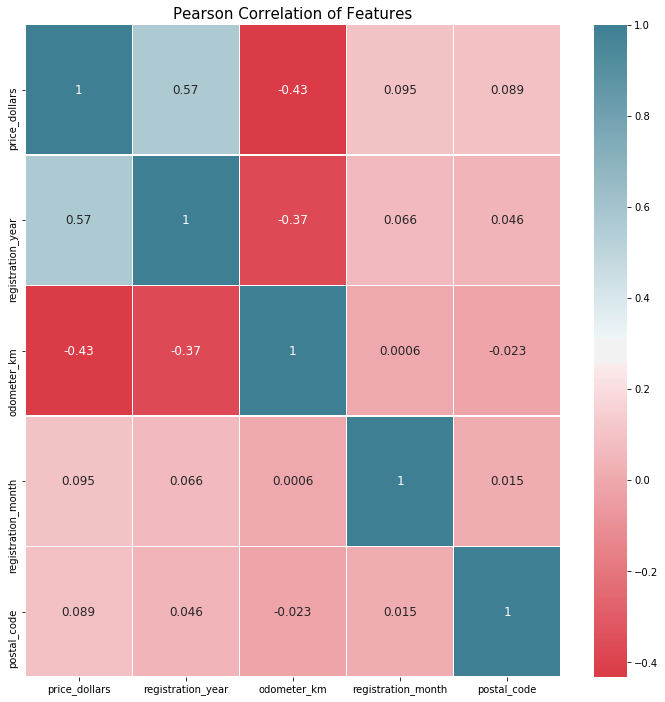

In [40]:
corr_matrix = autos_imp.corr()
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = colormap,
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()

The correlation matrix between numerical values show that the odometer_km and price_dollars are negatively correlated. However, we have to look at the distribution of these 2 variables to see if they are more or less normally distributed or not. 

## Pairplot: relationship between numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2b0e92950>,
      dtype=object)

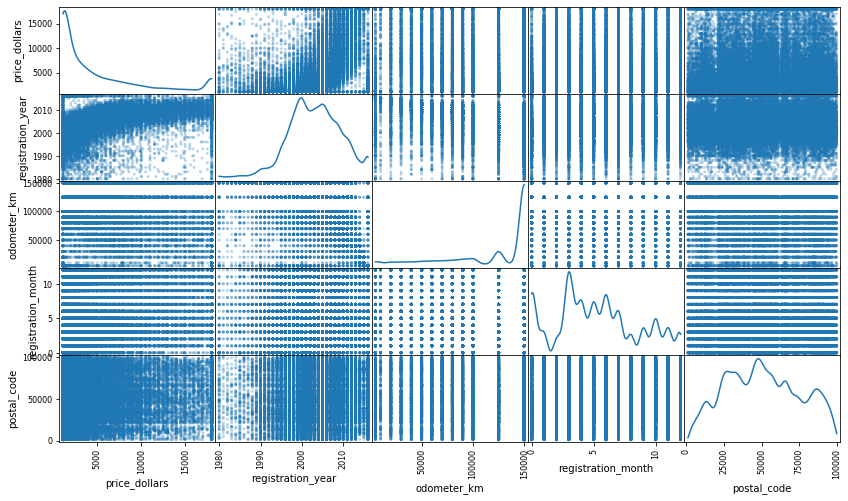

In [41]:
# Now the pairplot
pd.plotting.scatter_matrix(autos_imp,alpha = 0.3, figsize=(14,8), diagonal = 'kde')

Based on the pairplot, both the 'price_dollars' and 'odometer_km' don't display normal distribution. We are going to attempt some transformation to turn make the distribution more or less normal. 

## Data Transformation

### Log Transformation

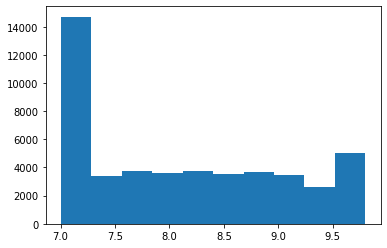

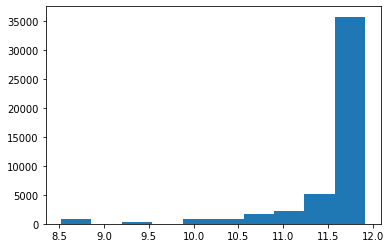

In [42]:
from scipy.stats import boxcox
from matplotlib import pyplot
#Both price_dollars and odometer_km
autos_imp2 = autos_imp.copy()
autos_imp2['price_dollars'] = np.log(autos_imp2['price_dollars'])
autos_imp2['odometer_km'] = np.log(autos_imp2['odometer_km'])


pyplot.hist(autos_imp2['price_dollars'])
pyplot.show()

pyplot.hist(autos_imp2['odometer_km'])
pyplot.show()

 The log transformation did not really work.. 

### Boxcox Transformation

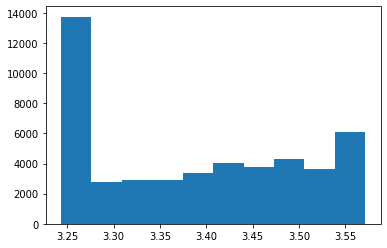

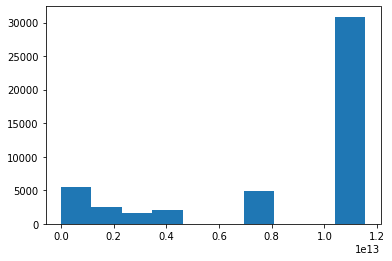

In [43]:
autos_imp3 = autos_imp.copy()
from scipy import stats


# power transform
autos_imp3['price_dollars'] = stats.boxcox(autos_imp3['price_dollars'])[0]
# histogram
pyplot.hist(autos_imp3['price_dollars'])
pyplot.show()



# power transform
autos_imp3['odometer_km'] = stats.boxcox(autos_imp3['odometer_km'])[0]
# histogram
pyplot.hist(autos_imp3['odometer_km'])
pyplot.show()


Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

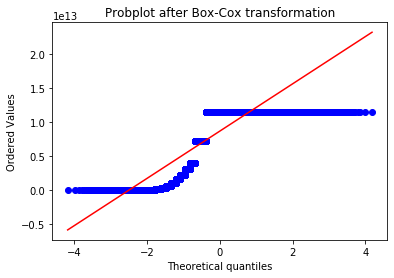

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.probplot(stats.boxcox(autos_imp3['odometer_km'])[0], dist=stats.norm, plot=ax)
ax.set_title('Probplot after Box-Cox transformation')

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

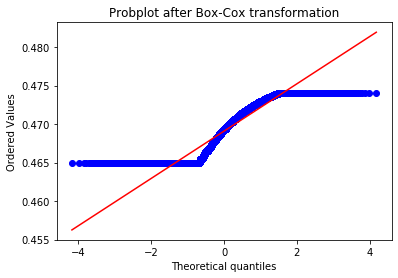

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.probplot(stats.boxcox(autos_imp3['price_dollars'])[0], dist=stats.norm, plot=ax)
ax.set_title('Probplot after Box-Cox transformation')

Also, boxcox transformation did not work... The decision is to leave the 'price_dollars' and 'odometer_km' as they are.

## Predictive Power Score

Advanges of using Predictive Power score over Pearson's correlation
- Prediction Power Score detects non linear relationship
- Finding relationship between non-numeric columns

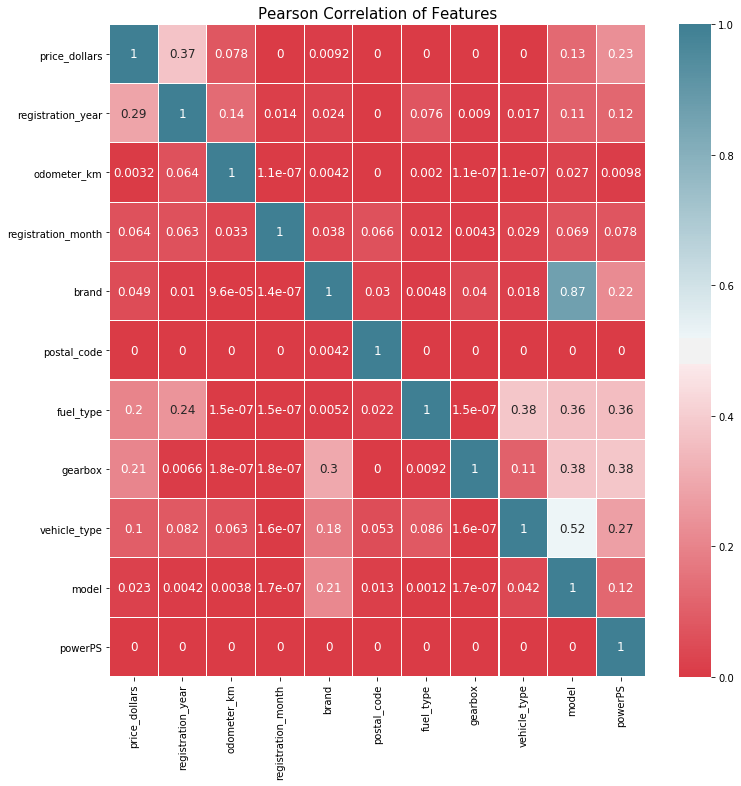

In [46]:
import warnings
warnings.filterwarnings('ignore')

# Predictive Power Score
cols_interest = ['price_dollars','registration_year','odometer_km','registration_month','brand','postal_code','fuel_type','gearbox','vehicle_type','model','powerPS']
corr_matrix = pps.matrix(autos_imp[cols_interest])
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = colormap,
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()


### Results of the Predictive Power Score Matrix
- Strong positive relationship between price_dollars registration year, gearbox, fuel_type and vehicle_type
- Assymetry between registration_year and price_dollars (0.29) and price_dollars and registration_year (0.37)
- Strong PPS of 0.87 between model and brand
- Most importantly, weak relationship between odometer_km and price_dollars
- Strong PPS of (model & vehicle_type), (powerPS & vehicle_type), (model & gearbox), (vehicle_type & fuel_type)

### Extracting year from 'year_ad' and month from 'last_seen'

In [47]:
autos_imp['year_ad'] = autos_imp['ad_created'].dt.year
#df[‘AppointmentDay_year’] = df[‘AppointmentDay’].dt.year
autos_imp['month_lastseen'] = autos_imp['last_seen'].dt.month

In [48]:
# how can year_ad predict price maybe
print(autos_imp.groupby('year_ad')['price_dollars'].mean()) 
print(autos_imp.groupby('month_lastseen')['price_dollars'].mean())

year_ad
2015    6949.833333
2016    5171.108220
Name: price_dollars, dtype: float64
month_lastseen
3    4171.499901
4    5908.784057
Name: price_dollars, dtype: float64


In [49]:
### Not yet... we have to drop off the datetime columns for now...
## And we can keep the year created.. and last month_seen..
autos_imp.drop(['last_seen','date_crawled','ad_created'],axis = 1, inplace = True)

### Feature Engineering: removing columns with low variance

In [50]:
autos_imp.head()

,name,seller,offerType,price_dollars,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,postal_code,year_ad,month_lastseen
0,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manuell,158,andere,150000.0,3,lpg,peugeot,nein,79588,2016,4
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,71034,2016,4
2,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,35394,2016,4
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatik,71,fortwo,70000.0,6,benzin,smart,nein,33729,2016,3
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,39218,2016,4


In [51]:
autos_imp2 = autos_imp.copy()

# y is price_dollars
cols = ['registration_year', 'powerPS','odometer_km','registration_month','year_ad','month_lastseen']


## It seems that VarianceThreshold only works on numerical columns
from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
autos_imp2_variance_threshold = sel.fit_transform(autos_imp2[cols])


In [52]:
autos_imp2_variance_threshold.shape  ###  year_ad was  apparently dropped due to low variance

(47474, 5)

In [53]:
autos_imp.shape

(47474, 18)

In [54]:
autos_imp.drop('year_ad',axis = 1, inplace = True)
autos_imp.shape # 47474 x 16

(47474, 17)

## Categorical EDA

In [55]:
def categorical_eda(cols,df):
    """Given cols, generate EDA of categorical data"""
    #print("To check: Unique count of non-numeric data")
    #print(df.select_dtypes(include=['category']).nunique())
 
    # Plot count distribution of categorical data
    for col in cols:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=45)
        plt.show()

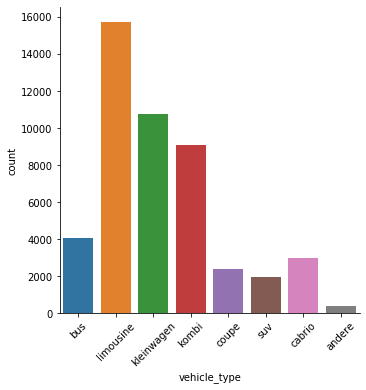

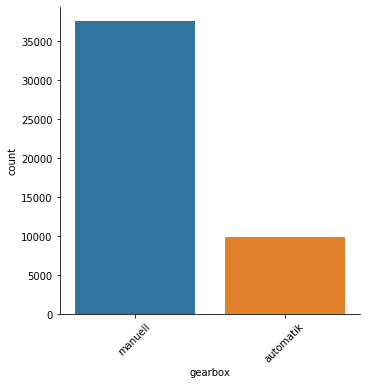

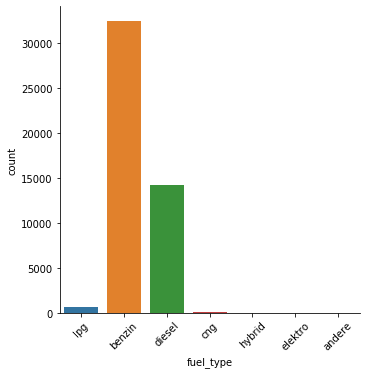

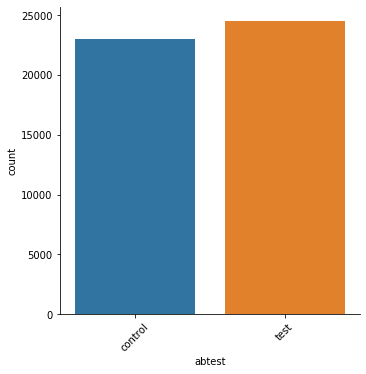

In [56]:
cols = ['vehicle_type','gearbox','fuel_type','abtest']
categorical_eda(cols, autos_imp)

### Translation of categories of the categorical columns from German to English

In [57]:
display(autos_imp['abtest'].unique())
display(autos_imp['vehicle_type'].unique())
display(autos_imp['seller'].unique())
display(autos_imp['gearbox'].unique())
display(autos_imp['unrepaired_damage'].unique())
display(autos_imp['offerType'].unique())  

array(['control', 'test'], dtype=object)

array(['bus', 'limousine', 'kleinwagen', 'kombi', 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

array(['privat', 'gewerblich'], dtype=object)

array(['manuell', 'automatik'], dtype=object)

array(['nein', 'ja'], dtype=object)

array(['Angebot', 'Gesuch'], dtype=object)

### Seller

In [58]:
autos_imp['seller'] = autos_imp['seller'].str.replace('privat','private').replace('gewerblich','commercial')

### Vehicle_type

In [59]:
autos_imp['vehicle_type'] = autos_imp['vehicle_type'].str.replace('Kombi','combi').replace('kleinwagen','small car').replace('cabrio','convertible').replace('andere','Other')

### Gearbox

In [60]:
autos_imp['gearbox'] =autos_imp['gearbox'].str.replace('manuell','manual').replace('automatik','automatic')

### Unrepaired Damage

In [61]:
autos_imp['unrepaired_damage']= autos_imp['unrepaired_damage'].str.replace('nein','no').replace('ja', 'yes')

### OfferType

In [62]:
autos_imp['offerType']= autos_imp['offerType'].str.replace('Angebot','offer').replace('Gesuch', 'searched')

### fuel_type

In [63]:
autos_imp['fuel_type']= autos_imp['fuel_type'].str.replace('benzin','gasoline').replace('elektro','electric').replace('andere','other')

# Simple Quantitative analyses

## Identification of  the most common brands

In [64]:
# To know the most common brand #Chaining... 
autos['brand'].value_counts(normalize=True).sort_values(ascending = False) 

volkswagen        0.21374
opel              0.10922
bmw               0.10858
mercedes_benz     0.09468
audi              0.08566
ford              0.06958
renault           0.04808
peugeot           0.02912
fiat              0.02616
seat              0.01882
skoda             0.01572
mazda             0.01514
nissan            0.01508
smart             0.01402
citroen           0.01402
toyota            0.01234
sonstige_autos    0.01092
hyundai           0.00976
volvo             0.00914
mini              0.00848
mitsubishi        0.00812
honda             0.00798
kia               0.00712
alfa_romeo        0.00658
porsche           0.00588
suzuki            0.00586
chevrolet         0.00566
chrysler          0.00362
dacia             0.00258
daihatsu          0.00256
jeep              0.00220
subaru            0.00218
land_rover        0.00198
saab              0.00160
daewoo            0.00158
trabant           0.00156
jaguar            0.00154
rover             0.00138
lancia      

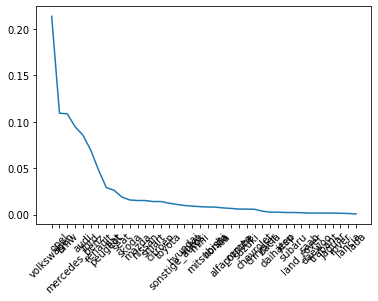

In [65]:
brand_s = autos['brand'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)
plt.plot((brand_s.index),brand_s.to_list())
plt.xticks(rotation=45)
plt.show()

Based on the number of ads for different brands, a criterion for determining 'Top band' is set.

Based on this plot, it seems the name 'Mercedes_benz' is causing some problems. We should replace it in the brand column


In [66]:
autos_imp['brand'].replace(to_replace = 'mercedes_benz', value = 'benz', inplace = True)

## Top brand/Most Popular brand criteria: greater than 1.5% of the listings 

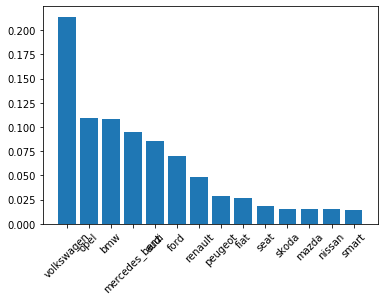

In [67]:
a = brand_s >= 0.015
top_brands = list(brand_s[:sum(a)+1].index)
plt.bar(top_brands, brand_s[:sum(a)+1])
plt.xticks(rotation=45)
plt.show()

## Average price of each brand

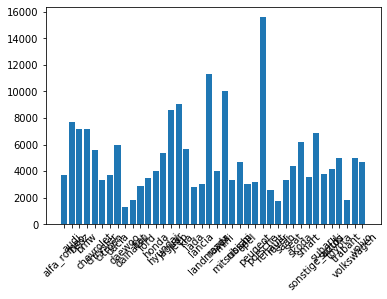

In [68]:
# huhh.. Aggregate & visualization... for data preprocessing...
autos_brand_meanprice = autos_imp.groupby('brand')['price_dollars'].mean()
brands_l = list(autos_brand_meanprice.index)

plt.bar(brands_l,autos_brand_meanprice )
plt.xticks(rotation=45)
plt.show()

### Average Price of Top Brands

In [69]:
autos_brand_meanprice = autos_imp.groupby('brand')['price_dollars'].mean()
brand_s = autos_imp['brand'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)
a = brand_s >= 0.015
top_brands = list(brand_s[:sum(a)+1].index)

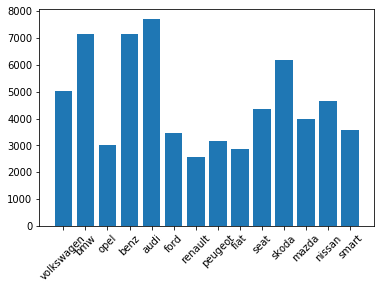

In [70]:
mean_price_top_brands = []
for brand in top_brands:
    mean_price_top_brands.append(autos_brand_meanprice[brand])
dict_top_brand_av_price = dict(zip(top_brands,mean_price_top_brands))

plt.bar(top_brands,mean_price_top_brands)
plt.xticks(rotation=45)
plt.show()

## Average mileage for each brand

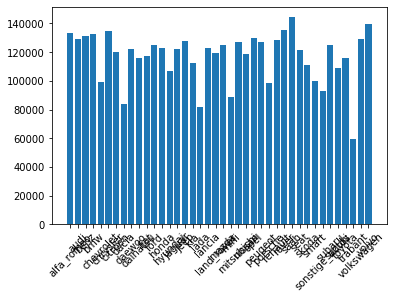

In [71]:
# huhh.. Aggregate & visualization... for data preprocessing...
autos_brand_meanmileage = autos_imp.groupby('brand')['odometer_km'].mean()
brands_l = list(autos_brand_meanmileage.index)

plt.bar(brands_l,autos_brand_meanmileage)
plt.xticks(rotation=45)
plt.show()

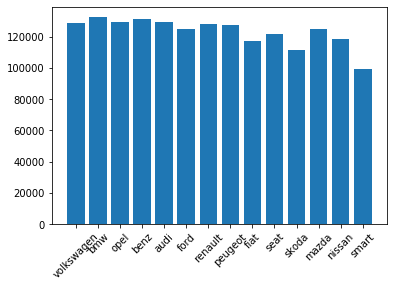

In [72]:
mean_mileage_top_brands = []
for brand in top_brands:
    mean_mileage_top_brands.append(autos_brand_meanmileage[brand])
dict_top_brand_av_mileage = dict(zip(top_brands,autos_brand_meanmileage))

plt.bar(top_brands,mean_mileage_top_brands)
plt.xticks(rotation=45)
plt.show()

Interestingly, all the most frequent models have simliar mileage

### Mileage and Price for top brands

In [73]:
# converting both dictionaries to series
top_brand_av_price_series = pd.Series(dict_top_brand_av_price)
top_brand_av_mileage_series = pd.Series(dict_top_brand_av_mileage)
top_brand_df = pd.DataFrame(top_brand_av_price_series, columns = ['mean_price'])
top_brand_df['mean_mileage'] = top_brand_av_mileage_series
top_brand_df

,mean_price,mean_mileage
volkswagen,5015.848191,133106.796117
bmw,7153.043346,129296.573359
opel,3032.395417,131244.993324
benz,7131.832443,132596.958175
audi,7707.668678,99367.588933
ford,3471.665044,134595.375723
renault,2555.498015,119772.727273
peugeot,3176.900424,83729.508197
fiat,2859.505341,122430.555556
seat,4346.199541,116188.524590


### Average registration year of top brands

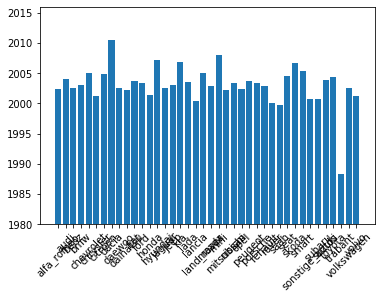

In [74]:
# huhh.. Aggregate & visualization... for data preprocessing...
autos_brand_mean_regyear = autos_imp.groupby('brand')['registration_year'].mean()
brands_l = list(autos_brand_meanprice.index)

plt.bar(brands_l,autos_brand_mean_regyear )
plt.ylim(1980,2016)
plt.xticks(rotation=45)
plt.show()

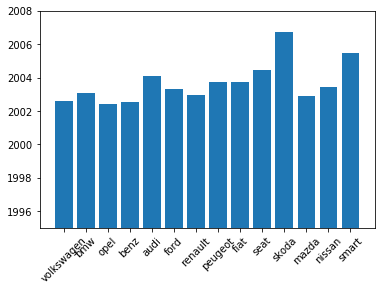

In [75]:
mean_regyear_top_brands = []
for brand in top_brands:
    mean_regyear_top_brands.append(autos_brand_mean_regyear[brand])
dict_top_brand_av_regyear = dict(zip(top_brands,autos_brand_mean_regyear))

plt.bar(top_brands,mean_regyear_top_brands)
plt.ylim(1995,2008)
plt.xticks(rotation=45)
plt.show()

The top brands all have registration year on average past year 2002.

## Relationship between mean price and mean mileage of most popular brands

In [76]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [77]:
import scipy.stats

top_brand_av_price_arr = top_brand_df['mean_price'].to_numpy()
top_brand_av_mileage_arr = top_brand_df['mean_mileage'].to_numpy()

scipy.stats.pearsonr(top_brand_av_price_arr, top_brand_av_mileage_arr)
# Nonsignificant correlation
# pearson r^2 of 0.056 and pvalue of 0.85

(0.05572013276853041, 0.8499414678073101)

There is no relationship between between mean mileage and mean price of top brands as shown by Prediction Power Score (PPS) matrix, but not the correlation matrix.

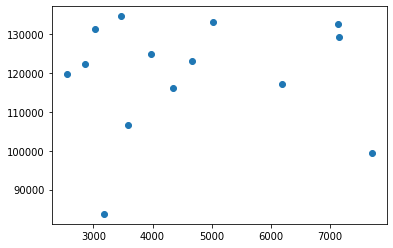

In [78]:
plt.plot(top_brand_df['mean_price'].to_list(),top_brand_df['mean_mileage'].to_list(),'o')

We noticed that audi, bmw and mercendes_benz are most expensive. While opel and renault are the least expensive among the popular brands. We aggreggated the mean mileage of these brands to see if the mileage has to do anything with the way they are priced. However, we found no correlation at least for these popular brands.

## Max Price of the top brands

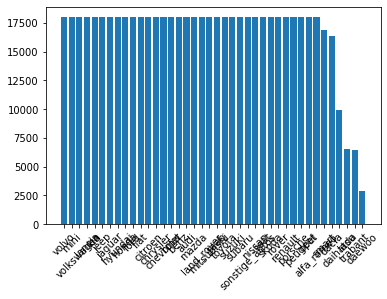

In [79]:
# Max price of the top brands... Ceiled with the outlier transformation.
autos_expensive = autos_imp.groupby('brand')['price_dollars'].max().sort_values(ascending = False)
brands_l = list(autos_expensive.index)
plt.bar(brands_l,autos_expensive )
plt.xticks(rotation=45)
plt.show()

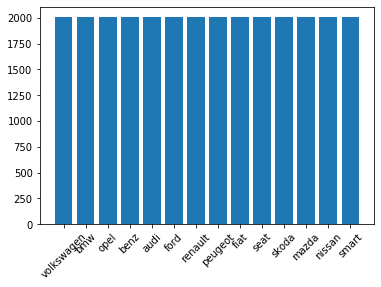

In [80]:
price_top_brands = []
for brand in top_brands:
   price_top_brands.append(autos_brand_mean_regyear[brand])
dict_top_brand_av_regyear = dict(zip(top_brands,price_top_brands))

plt.bar(top_brands,price_top_brands)
plt.xticks(rotation=45)
plt.show()

Unfortunately, with outlier transformation, we lost all information about most expensive and least expensive brands.

## Most popular brand-model combo

In [81]:
# Combination of brand and model that's most common
df_brand_model = autos_imp.groupby(['brand','model'])['name'].count().sort_values(ascending = False)

In [82]:
top_brand_model_l = list(df_brand_model.index)

In [83]:
percent_top_brand_model = ((df_brand_model.to_list())/np.sum(df_brand_model.to_list()))*100

In [84]:
a = percent_top_brand_model >= 1.5
top_brands_models = top_brand_model_l[:sum(a)+1]
display(top_brands_models)

[('volkswagen', 'golf'),
 ('bmw', '3er'),
 ('volkswagen', 'polo'),
 ('opel', 'corsa'),
 ('volkswagen', 'passat'),
 ('opel', 'astra'),
 ('audi', 'a4'),
 ('bmw', '5er'),
 ('benz', 'c_klasse'),
 ('benz', 'e_klasse'),
 ('audi', 'a3'),
 ('audi', 'a6'),
 ('ford', 'focus'),
 ('ford', 'fiesta'),
 ('volkswagen', 'transporter')]

### Grouping the odometer data into Buckets to detect a relationship with price_dollars

In [85]:
bins = [0, 100000, 125000, 150000]
autos_imp['odometer_bin'] = pd.cut(autos_imp['odometer_km'],bins)
np.histogram(autos['odometer_km'],bins)

(array([10237,  2169, 37594]), array([     0, 100000, 125000, 150000]))

In [86]:
autos_imp.groupby('odometer_bin')['price_dollars'].mean()

odometer_bin
(0, 100000]         8908.037563
(100000, 125000]    5692.043133
(125000, 150000]    3673.854528
Name: price_dollars, dtype: float64

### Relationship between repaired damage and price

In [87]:
autos_imp.groupby('unrepaired_damage')['price_dollars'].mean()

unrepaired_damage
no     5482.724843
yes    2365.260650
Name: price_dollars, dtype: float64

### Relationship between offer type and price

In [88]:
autos_imp.groupby('offerType')['price_dollars'].mean()

offerType
offer       5171.418785
searched    1100.000000
Name: price_dollars, dtype: float64

# Part II:  Prediction of  cars prices

In [89]:
autos_data = autos_imp.copy()
autos_prices = autos_data.pop('price_dollars')

# Dropping the autos names
autos_data.drop(columns = ['name','odometer_bin'], axis =1, inplace = True)



 ### Conversion of unrepaired_damage (yes/no) to binary with simple transformation

In [90]:
autos_data['unrepaired_damage']= autos_data['unrepaired_damage'].str.replace('yes','1').replace('no', '0').astype(int)

In [91]:
autos_data.head()

,seller,offerType,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,postal_code,month_lastseen
0,private,offer,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,0,79588,4
1,private,offer,control,limousine,1997,automatic,286,7er,150000.0,6,gasoline,bmw,0,71034,4
2,private,offer,test,limousine,2009,manual,102,golf,70000.0,7,gasoline,volkswagen,0,35394,4
3,private,offer,control,small car,2007,automatic,71,fortwo,70000.0,6,gasoline,smart,0,33729,3
4,private,offer,test,kombi,2003,manual,0,focus,150000.0,7,gasoline,ford,0,39218,4


In [92]:
# One hot encoding of categorical features
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame): # if not a dataframe, convert to a data frame...
            X = pd.DataFrame(X) 
        
        #label encoder    
        encoder = LabelEncoder()       
        Xt = encoder.fit_transform(X[self.column]) 
        cols = list(encoder.classes_) 
        
        # One hot encoder
        One_hot = OneHotEncoder(handle_unknown = 'ignore') # you can specify sparse = False
        Xtt = One_hot.fit_transform(Xt.reshape(-1,1))
        Xtt = Xtt.toarray()
        
        # Creating new data cols
        i = 0
        for col in cols:
            X[col]=Xtt[:,i]
            i+=1
        
        return X[cols]

In [93]:
# OHE (One hot encoder)
from sklearn.pipeline import FeatureUnion

seller_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['seller'])),
])

offer_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['offerType'])),
])

abtest_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['abtest'])),
])

vehicle_type_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['vehicle_type'])),
])

gearbox_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['gearbox'])),
])

model_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['model'])),
])

brand_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['brand'])),
])

fuel_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['fuel_type'])),
])


categorical_features = FeatureUnion([('pipe_onehot1',seller_onehot), ('pipe_onehot2',offer_onehot),('pipe_onehot3',abtest_onehot), ('pipe_onehot4',vehicle_type_onehot),
                                     ('pipe_onehot5',gearbox_onehot),('pipe_onehot6',model_onehot),('pipe_onehot7',fuel_onehot),('pipe_onehot8',brand_onehot)
])

In [94]:
# Numerical features...
numeric_cols = ['registration_year','powerPS','odometer_km','month_lastseen']

class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):# if not a dataframe, convert to a data frame...
            X = pd.DataFrame(X) 
                           
        return X[self.columns]  
    

In [95]:
numeric_features = Pipeline([
    ('cst', ColumnSelectTransformer(numeric_cols)),
])

In [96]:
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('categorical', categorical_features)
])

### Baseline Model: Simple Linear Regression model

In [102]:
# Linear Regression
# let's try simple regression model with no hypertuning as a 'baseline' of performance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

linear_model = Pipeline([('scaler',StandardScaler()), ('regressor',LinearRegression())])



business_model = Pipeline([
    ('features', business_features),
    # add your estimator here
    ('regressor',linear_model)
])

business_model.fit(autos_data,autos_prices)
y_pred = business_model.predict(autos_data)

print('R^2:{}'.format(business_model.score(autos_data,autos_prices)))
y_pred = business_model.predict(autos_data)
from sklearn import metrics
print('MSE: %f' % metrics.mean_squared_error(autos_prices, y_pred))
print('MAE: %f' % metrics.mean_absolute_error(autos_prices, y_pred))
print('R^2: %f' % metrics.r2_score(autos_prices, y_pred))

R^2:0.6860408395078009
MSE: 8165466.186261
MAE: 2022.789838
R^2: 0.686041


### Ensemble model: Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV


regressor = RandomForestRegressor(random_state = 0)
business_model = Pipeline([
    ('features', business_features),
    # add your estimator here
    ('regressor',regressor)
])

business_model.fit(autos_data,autos_prices)

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric',
                                                 Pipeline(memory=None,
                                                          steps=[('cst',
                                                                  ColumnSelectTransformer(columns=['registration_year',
                                                                                                   'powerPS',
                                                                                                   'odometer_km',
                                                                                                   'month_lastseen']))],
                                                          verbose=False)),
                                                ('categorical',
                                                 FeatureUnion(n_jobs=None,
                       

In [186]:
business_model.score(autos_data,autos_prices)

0.9765307838370803

In [187]:
y_pred = business_model.predict(autos_data)

In [188]:
from sklearn import metrics
print('MSE: %f' % metrics.mean_squared_error(autos_prices, y_pred))
print('MAE: %f' % metrics.mean_absolute_error(autos_prices, y_pred))
print('R^2: %f' % metrics.r2_score(autos_prices, y_pred))

MSE: 610388.595434
MAE: 440.905060
R^2: 0.976531


### Cross-validation

In [191]:
from sklearn.model_selection import cross_val_score
cross_val_score(business_model, autos_data,autos_prices, cv=5, scoring='accuracy').mean()

### Tuning of the hyperparameters

In [123]:
# Hypertuning of the RandomForest Model
from tempfile import mkdtemp
from shutil import rmtree


regressor = RandomForestRegressor(random_state = 0)

cachedir = mkdtemp()


param_grid = {'max_depth':range(2,20),
              'criterion':['mse','mae'],
              'min_samples_leaf': range(2,100,2),
              'min_samples_split': [2, 4, 6, 8, 10],
              'n_estimators':range(400,700,50),
              'max_features':['log2','sqrt']}

random_search = RandomizedSearchCV(regressor, param_grid, cv=5,n_jobs = 2,n_iter=10, verbose = 1)


business_model = Pipeline([
    ('features', business_features),
    # add your estimator here
    ('random_search',random_search)
])


business_model.fit(autos_data,autos_prices)
rmtree(cachedir)


print('Training R^2:{}'.format(business_model.score(autos_data,autos_prices)))
print('CV R^2:{}'.format(business_model.named_steps['random_search'].best_score_))
print(business_model.named_steps['random_search'].best_params_)


/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 1915.9min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 1941.9min finished
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bmr225/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Training R^2:0.7182480340603761
CV R^2:0.7082615346137644
{'n_estimators': 450, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'mse'}


### Building and Fitting the model

In [100]:
RF_regressor = RandomForestRegressor(n_estimators = 450, min_samples_split = 10, min_samples_leaf = 8, max_features = 'sqrt', max_depth = 13, criterion = 'mse', random_state = 0)
business_model = Pipeline([
    ('features', business_features),
    # add your estimator here
    ('estimator',RF_regressor)
])

business_model.fit(autos_data,autos_prices)
y_pred = business_model.predict(autos_data)
from sklearn import metrics
print('MSE: %f' % metrics.mean_squared_error(autos_prices, y_pred))
print('MAE: %f' % metrics.mean_absolute_error(autos_prices, y_pred))
print('R^2: %f' % metrics.r2_score(autos_prices, y_pred))

MSE: 7327819.794096
MAE: 1993.345703
R^2: 0.718248


## Segmentation of the cars on the craigslist 